In [ ]:

import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

df=pd.read_csv('Fincorpus - Sheet1 (1).csv')
df.shape
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,news_headline,news_article,news_category
0,World's 2nd largest radio telescope at Arecibo...,Arecibo Observatory's radio telescope in Puert...,technology
1,Salesforce acquires workplace chat app Slack f...,Salesforce on Tuesday said it has agreed to bu...,technology
2,"Musk denied 'Teslaquila' name by Mexico, the o...",Elon Musk's Tesla had applied to name their te...,technology
3,Facebook has asked Biden admin about help with...,Facebook has reached out to US President-elect...,technology
4,Facebook to pay UK publishers for their conten...,"Facebook, with the launch of its ""News"" tab in...",technology


In [ ]:
df.shape

(1623, 3)

In [ ]:

df['Total'] = df['news_headline'] + ' ' + df['news_article']
df.drop(columns=['news_headline', 'news_article'],inplace=True)
df.head()

df.isnull().sum()
df = df.dropna()

In [ ]:
df['news_category'].unique()

array(['technology', 'politics', 'entertainment', 'sports', 'science',
       'automobile', 'world', 'business'], dtype=object)

In [ ]:
df['news_category'].value_counts()

technology       380
entertainment    307
sports           230
politics         217
science          211
automobile        99
business          87
world             25
Name: news_category, dtype: int64

In [ ]:
df.shape

(1556, 2)

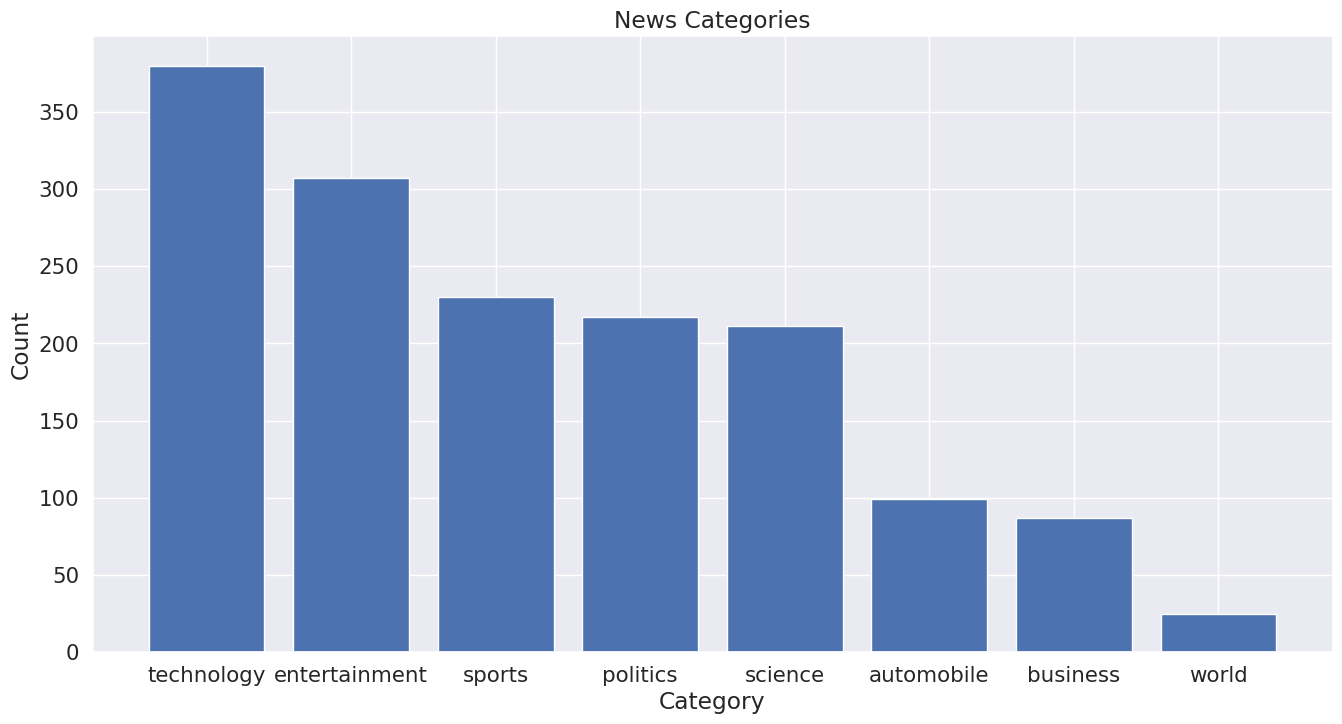

In [ ]:
import matplotlib.pyplot as plt

counts = df['news_category'].value_counts()
plt.figure(figsize=(16,8))
plt.bar(counts.index, counts.values)

plt.title('News Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [ ]:
df['news_category']=df['news_category'].apply(str)

In [ ]:

def text_preproces(x):
    x = str(x).lower()
    x = x.replace('%',' percent').replace(',000,000','m').replace('000','k').replace('′',"'").replace("’","'")\
                                .replace('$',' dollar').replace('€',' euro')\
                                .replace("what's",'"what is"').replace("that's",'that is').replace("he's","he is")\
                                .replace("won't","will not").replace("can't",'can not').replace("shouldn't","should not")\
                                .replace("she's","she is").replace("it's","it is").replace("'ve"," have").replace("'re"," are")\
                                .replace("'ll"," will").replace("i'm","i am").replace("n't", " not")
    x = re.sub(r'([0-9]+)000000',r'\1m',x)
    x = re.sub(r'([0-9]+)000',r'\1k',x)

    return x
def extract_features(df):
    df['Total'] = df['Total'].fillna("").apply(text_preproces)
    return df
df = extract_features(df)

In [ ]:
def rmv_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df.Total=df.Total.apply(rmv_urls)
def rmv_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

df.Total=df.Total.apply(rmv_html)

type(df['Total'])

pandas.core.series.Series

In [ ]:
df['Total'].head()

import re
def stop_words(s):

  stop_words=set(stopwords.words('english'))
  st_no_stop=[word for word in s if word not in stop_words]
  return st_no_stop
df["Total"].apply(stop_words)
df.head()

,news_category,Total
0,technology,world's 2nd largest radio telescope at arecibo...
1,technology,salesforce acquires workplace chat app slack f...
2,technology,"musk denied 'teslaquila' name by mexico, the o..."
3,technology,facebook has asked biden admin about help with...
4,technology,facebook to pay uk publishers for their conten...


Accuracy of KNN: 0.7628205128205128
Confusion Matrix: [[44  2  4  0  4 11  1  0]
 [ 0 39  1  0  0  0  2  0]
 [ 2  0 61  0  1  0  0  2]
 [ 3  0  7 31  1  1  0  1]
 [ 5  0  4  1 40  0  0  0]
 [ 1  0  1  0  0 16  0  0]
 [ 1  0  1  0  0  0  1  0]
 [ 8  1  4  0  1  3  0  6]]


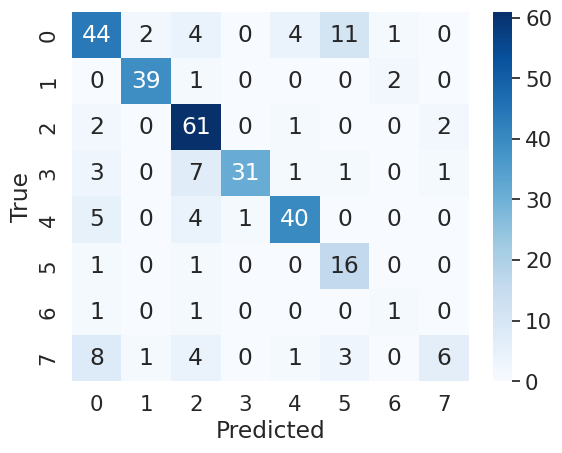

               precision    recall  f1-score     support
technology      0.516129  0.888889  0.653061   18.000000
politics        0.666667  0.260870  0.375000   23.000000
entertainment   0.734940  0.924242  0.818792   66.000000
sports          0.928571  0.928571  0.928571   42.000000
science         0.851064  0.800000  0.824742   50.000000
automobile      0.968750  0.704545  0.815789   44.000000
world           0.687500  0.666667  0.676923   66.000000
business        0.250000  0.333333  0.285714    3.000000
accuracy        0.762821  0.762821  0.762821    0.762821
macro avg       0.700453  0.688390  0.672324  312.000000
weighted avg    0.780234  0.762821  0.756687  312.000000
Average Recall Score: 0.6883897201831986
Average Precision Score: 0.7004525895399424


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tf = TfidfVectorizer(max_features=2500,lowercase=False,ngram_range=(1,2))
trte_vectors = vectorizer_tf.fit_transform(df.Total)
trte_vectors.shape

trte_df = pd.DataFrame(trte_vectors.toarray(),columns=vectorizer_tf.get_feature_names_out())
len(trte_df),trte_df.shape

trte_df.shape

from sklearn.model_selection import train_test_split
y=df["news_category"]
X_train, X_test, y_train, y_test = train_test_split(trte_df, y, test_size= 0.2, random_state=13)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
k=df["news_category"].nunique()
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of KNN:', accuracy)
# confusion matrix of the model
cm = confusion_matrix(y_test, y_pred,labels=['technology', 'politics', 'entertainment', 'sports',
       'science', 'automobile', 'world', 'business'])
print('Confusion Matrix:', cm)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
report = classification_report(y_test, y_pred, target_names=['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business'], output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)
recall_scores = {}
for cls in ['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business']:
    recall_scores[cls] = recall_score(y_test, y_pred, labels=[cls], average='macro')
avg_recall = sum(recall_scores.values()) / len(recall_scores)
print('Average Recall Score:', avg_recall)

precision_scores = {}
for cls in ['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business']:
    precision_scores[cls] = precision_score(y_test, y_pred, labels=[cls], average='macro')
avg_precision = sum(precision_scores.values()) / len(precision_scores)
print('Average Precision Score:', avg_precision)

Accuracy of Bayesian classifier: 0.7724358974358975
Confusion Matrix: [[60  0  2  1  2  1  0  0]
 [ 1 40  0  1  0  0  0  0]
 [ 5  3 54  4  0  0  0  0]
 [ 6  1  5 32  0  0  0  0]
 [ 9  0  5  0 36  0  0  0]
 [ 2  0  0  0  0 16  0  0]
 [ 1  1  0  0  0  0  1  0]
 [16  0  3  0  0  2  0  2]]


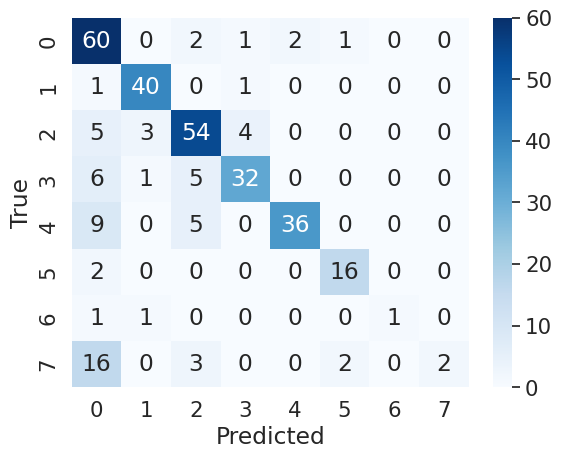

               precision    recall  f1-score     support
technology      0.842105  0.888889  0.864865   18.000000
politics        1.000000  0.086957  0.160000   23.000000
entertainment   0.782609  0.818182  0.800000   66.000000
sports          0.888889  0.952381  0.919540   42.000000
science         0.947368  0.720000  0.818182   50.000000
automobile      0.842105  0.727273  0.780488   44.000000
world           0.600000  0.909091  0.722892   66.000000
business        1.000000  0.333333  0.500000    3.000000
accuracy        0.772436  0.772436  0.772436    0.772436
macro avg       0.862885  0.679513  0.695746  312.000000
weighted avg    0.814630  0.772436  0.753621  312.000000
Average Recall Score: 0.67951314386097
Average Precision Score: 0.8628845664886855


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Bayesian classifier:", accuracy)
cm = confusion_matrix(y_test, y_pred,labels=['technology', 'politics', 'entertainment', 'sports',
       'science', 'automobile', 'world', 'business'])
print('Confusion Matrix:', cm)

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
report = classification_report(y_test, y_pred, target_names=['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business'], output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)
recall_scores = {}
for cls in ['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business']:
    recall_scores[cls] = recall_score(y_test, y_pred, labels=[cls], average='macro')
avg_recall = sum(recall_scores.values()) / len(recall_scores)
print('Average Recall Score:', avg_recall)

precision_scores = {}
for cls in ['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business']:
    precision_scores[cls] = precision_score(y_test, y_pred, labels=[cls], average='macro')
avg_precision = sum(precision_scores.values()) / len(precision_scores)
print('Average Precision Score:', avg_precision)

Accuracy of SVM: 0.8173076923076923
Confusion Matrix: [[55  1  4  1  2  3  0  0]
 [ 1 40  0  1  0  0  0  0]
 [ 1  0 60  4  1  0  0  0]
 [ 3  0  3 37  1  0  0  0]
 [ 9  0  3  0 38  0  0  0]
 [ 2  0  0  0  0 16  0  0]
 [ 2  0  0  0  0  0  1  0]
 [11  0  3  0  1  0  0  8]]


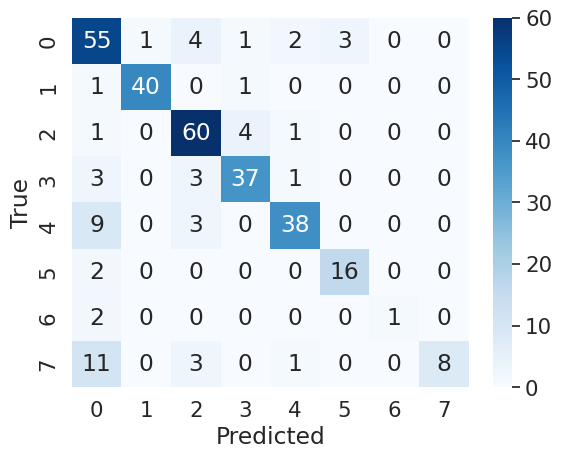

               precision    recall  f1-score     support
technology      0.842105  0.888889  0.864865   18.000000
politics        1.000000  0.347826  0.516129   23.000000
entertainment   0.821918  0.909091  0.863309   66.000000
sports          0.975610  0.952381  0.963855   42.000000
science         0.883721  0.760000  0.817204   50.000000
automobile      0.860465  0.840909  0.850575   44.000000
world           0.654762  0.833333  0.733333   66.000000
business        1.000000  0.333333  0.500000    3.000000
accuracy        0.817308  0.817308  0.817308    0.817308
macro avg       0.879823  0.733220  0.763659  312.000000
weighted avg    0.838593  0.817308  0.811168  312.000000
Average Recall Score: 0.7332203243616285
Average Precision Score: 0.8798225973435208


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of SVM:', accuracy)
cm = confusion_matrix(y_test, y_pred,labels=['technology', 'politics', 'entertainment', 'sports',
       'science', 'automobile', 'world', 'business'])
print('Confusion Matrix:', cm)

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
report = classification_report(y_test, y_pred, target_names=['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business'], output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)
recall_scores = {}
for cls in ['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business']:
    recall_scores[cls] = recall_score(y_test, y_pred, labels=[cls], average='macro')
avg_recall = sum(recall_scores.values()) / len(recall_scores)
print('Average Recall Score:', avg_recall)

precision_scores = {}
for cls in ['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business']:
    precision_scores[cls] = precision_score(y_test, y_pred, labels=[cls], average='macro')
avg_precision = sum(precision_scores.values()) / len(precision_scores)
print('Average Precision Score:', avg_precision)

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred, labels=['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business'], average=None)
print('Precision:', precision)
recall = recall_score(y_test, y_pred, labels=['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business'], average=None)
print('Recall:', recall)


Precision: [0.6547619  0.97560976 0.82191781 0.86046512 0.88372093 0.84210526
 1.         1.        ]
Recall: [0.83333333 0.95238095 0.90909091 0.84090909 0.76       0.88888889
 0.33333333 0.34782609]


Accuracy of Random Forest Classifier: 0.7532051282051282
Confusion Matrix: [[57  0  4  1  3  1  0  0]
 [ 3 37  2  0  0  0  0  0]
 [ 3  1 57  5  0  0  0  0]
 [ 6  0  4 32  2  0  0  0]
 [12  0  2  2 34  0  0  0]
 [ 5  0  0  0  0 13  0  0]
 [ 3  0  0  0  0  0  0  0]
 [16  1  0  1  0  0  0  5]]


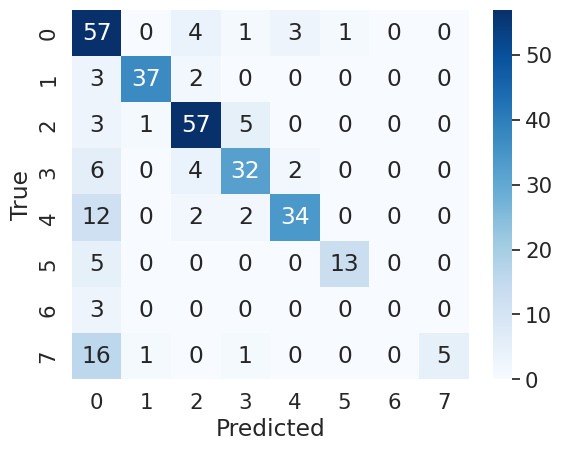

               precision    recall  f1-score     support
technology      0.928571  0.722222  0.812500   18.000000
politics        1.000000  0.217391  0.357143   23.000000
entertainment   0.826087  0.863636  0.844444   66.000000
sports          0.948718  0.880952  0.913580   42.000000
science         0.871795  0.680000  0.764045   50.000000
automobile      0.780488  0.727273  0.752941   44.000000
world           0.542857  0.863636  0.666667   66.000000
business        0.000000  0.000000  0.000000    3.000000
accuracy        0.753205  0.753205  0.753205    0.753205
macro avg       0.737315  0.619389  0.638915  312.000000
weighted avg    0.794365  0.753205  0.744470  312.000000
Average Recall Score: 0.6193889202584855
Average Precision Score: 0.7373145191676475


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Random Forest Classifier:', accuracy)
cm = confusion_matrix(y_test, y_pred,labels=['technology', 'politics', 'entertainment', 'sports',
       'science', 'automobile', 'world', 'business'])
print('Confusion Matrix:', cm)

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
report = classification_report(y_test, y_pred, target_names=['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business'], output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)
recall_scores = {}
for cls in ['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business']:
    recall_scores[cls] = recall_score(y_test, y_pred, labels=[cls], average='macro')
avg_recall = sum(recall_scores.values()) / len(recall_scores)
print('Average Recall Score:', avg_recall)

precision_scores = {}
for cls in ['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business']:
    precision_scores[cls] = precision_score(y_test, y_pred, labels=[cls], average='macro')
avg_precision = sum(precision_scores.values()) / len(precision_scores)
print('Average Precision Score:', avg_precision)

Accuracy of Gradient Boosting Classifier: 0.7435897435897436
Confusion Matrix: [[16  0  0  0  0  0  2  0]
 [ 1  7  1  1  0  0 13  0]
 [ 0  0 54  0  2  2  8  0]
 [ 0  0  0 35  0  0  6  1]
 [ 0  0  1  0 33  2 14  0]
 [ 0  1  4  0  0 34  5  0]
 [ 5  1  2  0  4  1 53  0]
 [ 0  0  0  1  0  0  2  0]]


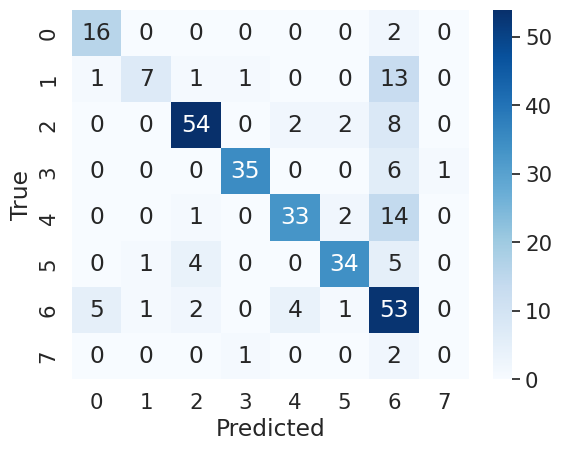

               precision    recall  f1-score    support
technology      0.727273  0.888889  0.800000   18.00000
politics        0.777778  0.304348  0.437500   23.00000
entertainment   0.870968  0.818182  0.843750   66.00000
sports          0.945946  0.833333  0.886076   42.00000
science         0.846154  0.660000  0.741573   50.00000
automobile      0.871795  0.772727  0.819277   44.00000
world           0.514563  0.803030  0.627219   66.00000
business        0.000000  0.000000  0.000000    3.00000
accuracy        0.743590  0.743590  0.743590    0.74359
macro avg       0.694310  0.635064  0.644424  312.00000
weighted avg    0.778273  0.743590  0.743232  312.00000
Average Recall Score: 0.6350636802810716
Average Precision Score: 0.6943095022095962


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Gradient Boosting Classifier:', accuracy)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', cm)

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
report = classification_report(y_test, y_pred, target_names=['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business'], output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)
recall_scores = {}
for cls in ['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business']:
    recall_scores[cls] = recall_score(y_test, y_pred, labels=[cls], average='macro')
avg_recall = sum(recall_scores.values()) / len(recall_scores)
print('Average Recall Score:', avg_recall)

precision_scores = {}
for cls in ['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business']:
    precision_scores[cls] = precision_score(y_test, y_pred, labels=[cls], average='macro')
avg_precision = sum(precision_scores.values()) / len(precision_scores)
print('Average Precision Score:', avg_precision)

Accuracy of Support Vector Machine Classifier: 0.782051282051282
Confusion Matrix: [[13  0  0  0  0  0  5  0]
 [ 0  0  2  0  0  0 21  0]
 [ 0  0 63  0  1  1  1  0]
 [ 0  0  1 37  0  0  4  0]
 [ 0  0  3  0 33  0 14  0]
 [ 0  0  3  0  0 36  5  0]
 [ 1  0  2  0  1  0 62  0]
 [ 0  0  0  0  0  0  3  0]]


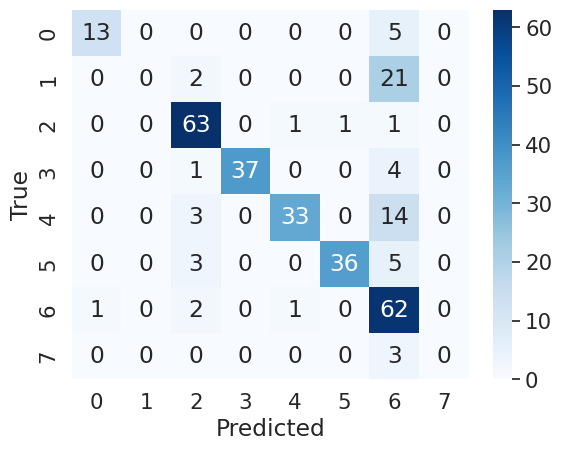

               precision    recall  f1-score     support
technology      0.928571  0.722222  0.812500   18.000000
politics        0.000000  0.000000  0.000000   23.000000
entertainment   0.851351  0.954545  0.900000   66.000000
sports          1.000000  0.880952  0.936709   42.000000
science         0.942857  0.660000  0.776471   50.000000
automobile      0.972973  0.818182  0.888889   44.000000
world           0.539130  0.939394  0.685083   66.000000
business        0.000000  0.000000  0.000000    3.000000
accuracy        0.782051  0.782051  0.782051    0.782051
macro avg       0.654360  0.621912  0.624956  312.000000
weighted avg    0.770640  0.782051  0.758067  312.000000
Average Recall Score: 0.621911976911977
Average Precision Score: 0.6543604163169381


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Support Vector Machine Classifier:', accuracy)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', cm)

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
report = classification_report(y_test, y_pred, target_names=['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business'], output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)
recall_scores = {}
for cls in ['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business']:
    recall_scores[cls] = recall_score(y_test, y_pred, labels=[cls], average='macro')
avg_recall = sum(recall_scores.values()) / len(recall_scores)
print('Average Recall Score:', avg_recall)

precision_scores = {}
for cls in ['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business']:
    precision_scores[cls] = precision_score(y_test, y_pred, labels=[cls], average='macro')
avg_precision = sum(precision_scores.values()) / len(precision_scores)
print('Average Precision Score:', avg_precision)

Accuracy of Support Vector Machine Classifier: 0.4967948717948718
Confusion Matrix: [[13  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0 23  0]
 [ 0  0 39  0  0  0 27  0]
 [ 0  0  0 14  0  0 28  0]
 [ 0  0  0  0 14  0 36  0]
 [ 0  0  2  0  0 10 32  0]
 [ 1  0  0  0  0  0 65  0]
 [ 0  0  0  0  0  0  3  0]]


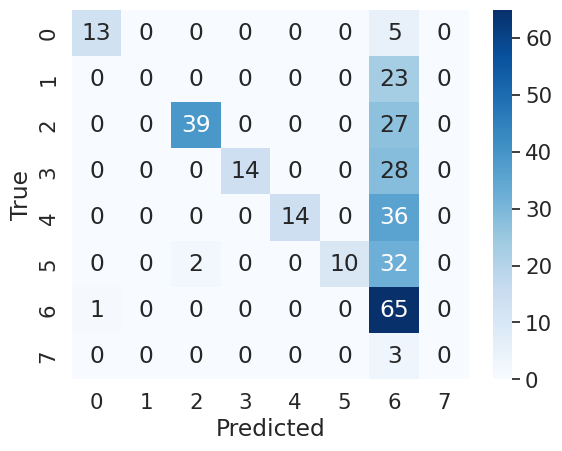

               precision    recall  f1-score     support
technology      0.928571  0.722222  0.812500   18.000000
politics        0.000000  0.000000  0.000000   23.000000
entertainment   0.951220  0.590909  0.728972   66.000000
sports          1.000000  0.333333  0.500000   42.000000
science         1.000000  0.280000  0.437500   50.000000
automobile      1.000000  0.227273  0.370370   44.000000
world           0.296804  0.984848  0.456140   66.000000
business        0.000000  0.000000  0.000000    3.000000
accuracy        0.496795  0.496795  0.496795    0.496795
macro avg       0.647074  0.392323  0.413185  312.000000
weighted avg    0.753474  0.496795  0.487223  312.000000
Average Recall Score: 0.3923232323232323
Average Precision Score: 0.6470743242168234


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='poly', random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Support Vector Machine Classifier:', accuracy)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', cm)

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
report = classification_report(y_test, y_pred, target_names=['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business'], output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)
recall_scores = {}
for cls in ['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business']:
    recall_scores[cls] = recall_score(y_test, y_pred, labels=[cls], average='macro')
avg_recall = sum(recall_scores.values()) / len(recall_scores)
print('Average Recall Score:', avg_recall)

precision_scores = {}
for cls in ['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business']:
    precision_scores[cls] = precision_score(y_test, y_pred, labels=[cls], average='macro')
avg_precision = sum(precision_scores.values()) / len(precision_scores)
print('Average Precision Score:', avg_precision)

Accuracy of Support Vector Machine Classifier: 0.8108974358974359
Confusion Matrix: [[15  0  1  0  0  0  2  0]
 [ 0  8  4  0  1  1  9  0]
 [ 0  0 60  0  1  4  1  0]
 [ 0  0  1 40  0  0  1  0]
 [ 0  0  3  0 38  0  9  0]
 [ 0  0  3  0  2 36  3  0]
 [ 3  0  4  1  2  0 56  0]
 [ 0  0  0  0  0  0  3  0]]


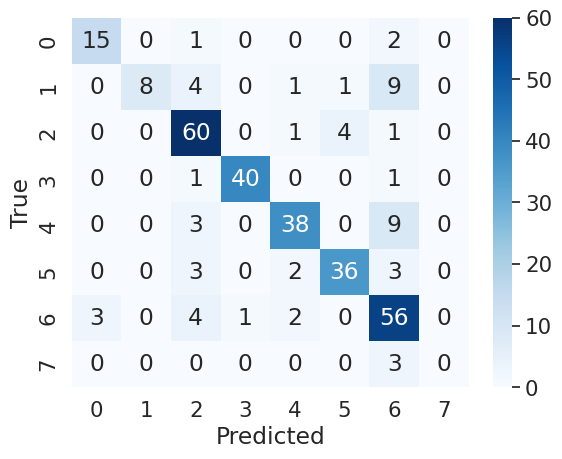

               precision    recall  f1-score     support
technology      0.833333  0.833333  0.833333   18.000000
politics        1.000000  0.347826  0.516129   23.000000
entertainment   0.789474  0.909091  0.845070   66.000000
sports          0.975610  0.952381  0.963855   42.000000
science         0.863636  0.760000  0.808511   50.000000
automobile      0.878049  0.818182  0.847059   44.000000
world           0.666667  0.848485  0.746667   66.000000
business        0.000000  0.000000  0.000000    3.000000
accuracy        0.810897  0.810897  0.810897    0.810897
macro avg       0.750846  0.683662  0.695078  312.000000
weighted avg    0.823387  0.810897  0.801614  312.000000
Average Recall Score: 0.6836622435535479
Average Precision Score: 0.7508460730540318


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='sigmoid', random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Support Vector Machine Classifier:', accuracy)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', cm)

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
report = classification_report(y_test, y_pred, target_names=['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business'], output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)
recall_scores = {}
for cls in ['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business']:
    recall_scores[cls] = recall_score(y_test, y_pred, labels=[cls], average='macro')
avg_recall = sum(recall_scores.values()) / len(recall_scores)
print('Average Recall Score:', avg_recall)

precision_scores = {}
for cls in ['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business']:
    precision_scores[cls] = precision_score(y_test, y_pred, labels=[cls], average='macro')
avg_precision = sum(precision_scores.values()) / len(precision_scores)
print('Average Precision Score:', avg_precision)

Accuracy of Logistic Regression: 0.7660256410256411
Confusion Matrix: [[15  0  1  0  0  0  2  0]
 [ 0  8  4  0  1  1  9  0]
 [ 0  0 60  0  1  4  1  0]
 [ 0  0  1 40  0  0  1  0]
 [ 0  0  3  0 38  0  9  0]
 [ 0  0  3  0  2 36  3  0]
 [ 3  0  4  1  2  0 56  0]
 [ 0  0  0  0  0  0  3  0]]


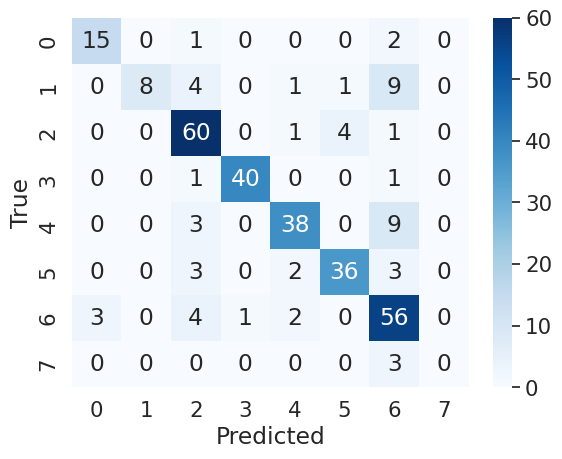

               precision    recall  f1-score     support
technology      0.833333  0.833333  0.833333   18.000000
politics        1.000000  0.347826  0.516129   23.000000
entertainment   0.789474  0.909091  0.845070   66.000000
sports          0.975610  0.952381  0.963855   42.000000
science         0.863636  0.760000  0.808511   50.000000
automobile      0.878049  0.818182  0.847059   44.000000
world           0.666667  0.848485  0.746667   66.000000
business        0.000000  0.000000  0.000000    3.000000
accuracy        0.810897  0.810897  0.810897    0.810897
macro avg       0.750846  0.683662  0.695078  312.000000
weighted avg    0.823387  0.810897  0.801614  312.000000
Average Recall Score: 0.6836622435535479
Average Precision Score: 0.7508460730540318


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from sklearn.linear_model import LogisticRegression


# Fit Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print('Accuracy of Logistic Regression:', lr_accuracy)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', cm)

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
report = classification_report(y_test, y_pred, target_names=['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business'], output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)
recall_scores = {}
for cls in ['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business']:
    recall_scores[cls] = recall_score(y_test, y_pred, labels=[cls], average='macro')
avg_recall = sum(recall_scores.values()) / len(recall_scores)
print('Average Recall Score:', avg_recall)

precision_scores = {}
for cls in ['technology', 'politics', 'entertainment', 'sports', 'science', 'automobile', 'world', 'business']:
    precision_scores[cls] = precision_score(y_test, y_pred, labels=[cls], average='macro')
avg_precision = sum(precision_scores.values()) / len(precision_scores)
print('Average Precision Score:', avg_precision)

**Result:**
SVM Classifier with Linear kernel performed best